#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* Andrea Carolina Treviño Garza A01034993
* David Winterman Hemilson A00919441
* Pedro Ulises Meléndez Ortega A00716301
* José David Hernández Navarro A01793121


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [301]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.preprocessing import FunctionTransformer   
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

#**Ejercicio-1.** 

In [162]:
Path = "/content/dataset_Facebook.csv"
df = pd.read_csv(Path, delimiter=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [163]:
df.shape

(500, 19)

In [164]:
df.rename(columns={"Lifetime People who have liked your Page and engaged with your post":"LPE"}, inplace=True)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [273]:
#Se definen las variables de entrada y salida
#Y=pd.to_numeric(df["LPE"], downcast="float")
Y=df["LPE"]
X=df[["Category", "Page total likes", "Type", "Post Month", "Post Hour", "Post Weekday", "Paid"]]

In [243]:
#Comprobación variable de Salida
Y.head()

0     119
1    1108
2     132
3    1386
4     396
Name: LPE, dtype: int64

In [244]:
#Comprobación variables de entrada
X.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0


#**Ejercicio-2.**

In [274]:
#Se aplican 100 datos de prueba, lo que equivale a el 20% de la base de datos

Xtv, Xtest, Ytv, Ytest = train_test_split(X, Y, test_size=0.20) 
Xtv.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
219,3,131956,Photo,8,12,1,0.0
423,1,102112,Photo,3,18,1,0.0
353,3,116435,Photo,5,7,3,0.0
399,3,107907,Photo,4,13,4,0.0
74,1,137893,Video,11,11,3,0.0


In [275]:
Ytv.head()

219    584
423    344
353    676
399    505
74     447
Name: LPE, dtype: int64

In [276]:
print(Xtv.shape)
print(Ytv.shape)

(400, 7)
(400,)


#**Ejercicio-3.**

In [277]:
def mi_RMSE (y_val , yhatVal):              # "y_val" es el valor observado real, "yhatVal" es el valor de predicción
  return np.sqrt(np.square(y_val-yhatVal).mean())

In [278]:
# "y_val" es el valor observado real, "yhatVal" es el valor de predicción
#def mi_RMSE(y_val, yhatVal): 
#  SSE = sum(np.square(y_val - yhatVal))
#  MSE = SSE/(y_val.shape[0])
#  RMSE = np.sqrt(MSE)
#  return RMSE

In [279]:
def mi_MAE (y_val,yhatVal):                    # "y_val" es el valor observado real, "yhatVal" es el valor de predicción
    return np.abs(y_val-yhatVal).mean()

In [132]:
#def mi_MAE(y_val, yhatVal):
#  Abs_Err = sum(np.abs(y_val - yhatVal))
#  MAE = Abs_Err/(y_val.shape[0])
#  return MAE

In [280]:
def mi_MAPE (y_val,yhatVal):                    # "y_val" es el valor observado real, "yhatVal" es el valor de predicción
  mape = np.mean(np.abs((y_val - yhatVal) / y_val))
  return (mape)

In [215]:
#def mi_MAPE(y_val, yhatVal):
#  Abs_Err2 = sum(np.abs((y_val - yhatVal)/y_val))
#  MAPE = Abs_Err2*(100/(y_val.shape[0]))
#  return MAPE

#**Ejercicio-4.**

In [281]:
#Analizamos los tipos de variables en nuestro conjunto de entrada Xtv
Xtv.dtypes

Category              int64
Page total likes      int64
Type                 object
Post Month            int64
Post Hour             int64
Post Weekday          int64
Paid                float64
dtype: object

In [282]:
Xtv.isnull().any()

Category            False
Page total likes    False
Type                False
Post Month          False
Post Hour           False
Post Weekday        False
Paid                 True
dtype: bool

In [283]:
Xtv['Paid'].fillna(value = Xtv.Paid.median(), 
                    inplace = True)

In [284]:
Xtv.isnull().any()

Category            False
Page total likes    False
Type                False
Post Month          False
Post Hour           False
Post Weekday        False
Paid                False
dtype: bool

In [285]:
Xtv["Type"].value_counts()

Photo     339
Status     37
Link       17
Video       7
Name: Type, dtype: int64

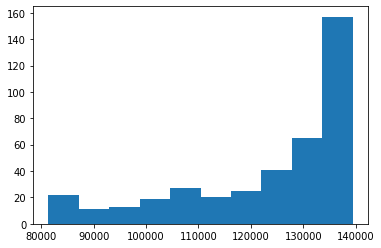

In [286]:
#Variable de entrada
plt.hist(Xtv["Page total likes"])
plt.show()

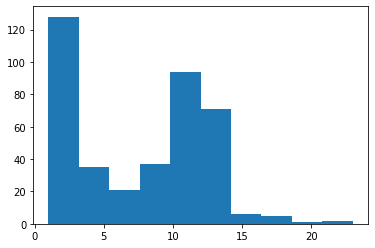

In [287]:
#Variable de entrada
plt.hist(Xtv["Post Hour"])
plt.show()

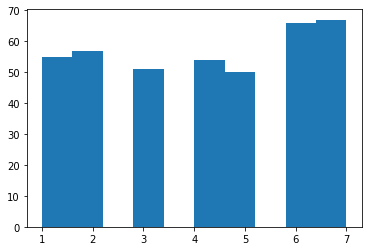

In [288]:
#Variable de entrada
plt.hist(Xtv["Post Weekday"])
plt.show()

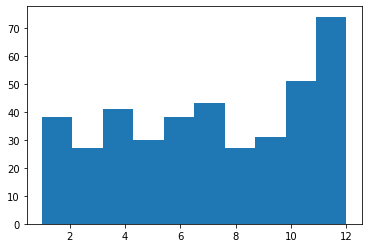

In [289]:
#Variable de entrada
plt.hist(Xtv["Post Month"])
plt.show()

In [290]:
#Variable de entrada
Xtv["Paid"].value_counts()

0.0    286
1.0    114
Name: Paid, dtype: int64

In [291]:
Xtv["Category"].value_counts()

1    171
3    124
2    105
Name: Category, dtype: int64

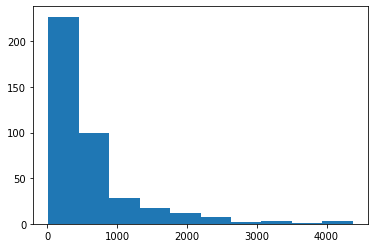

In [292]:
#Variable de salida
plt.hist(Ytv)
plt.show()

In [293]:
#Mi versión:

#Funciones para variables de entrada:
#Para variables con sesgo positivo
def funNumPos(x):
  pos = np.log(x)
  return pos

#Para variables con sesgo negativo
def funNumNeg(x):
  c = x.max()+1
  neg = np.log(c-x)
  return neg

#Para mi variable "object"
def funMap(df):
  df['Type'] = df['Type'].map({ 'Photo':1, 'Status':2, 'Link':3, 'Video':3})
  return df
#Transformar categorias 'Photo', 'Status', 'Link', 'Video' a valores enteros. Se junta categoría Link y Video en una sola categoría al tener muy pocos datos "Video"

#Funciones para variable de salida:
#Ya que es una variable con sesgo positivo
def y_transform(Y):
  y_ = Y.copy()
  y_ = np.sqrt(y_)
  return y_

#Se define también su inversa para regresar los valores "y" en la escala original.
def y_invTrans(Y):
  y_ = Y.copy()
  y_ = np.power(y_,2)
  return y_


In [230]:
#CODIGO DAVID WINTERMAN
 #Transformaciones a variables numéricas de entrada:
#num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
#                                 ('escalaNum', MinMaxScaler(feature_range=(0,1)))])   
#num_pipeline_nombres = ["Page total likes"] 

# Transformaciones a variables categóricos de entrada:
#catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
#catImp_pipeline_nombres = ['Type', "Post Weekday","Post Hour", "Category", "Post Month"]

# Transformaciones one-hot-encoder en variables categóricas y binarias (no numéricas):
#catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
#catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(handle_unknown="ignore", sparse=False))])
#catOHE_pipeline_nombres = ['Paid']

In [294]:
#Transformaciones a variables numéricas de entrada:
num_pipe = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(0,1)))])   
num_pipe_nombres = ["Page total likes", "Post Hour", "Post Weekday", "Post Month"] 

numLogPos_pipe = Pipeline(steps = [('logNumPos', FunctionTransformer(funNumPos))]) 
numLogPos_pipe_nombre = ["Post Hour","Post Weekday", "Post Month"]

numLogNeg_pipe = Pipeline(steps = [('logNumNeg', FunctionTransformer(funNumNeg))]) 
numLogNeg_pipe_nombre = ["Page total likes"]

#Transformaciones a variables categóricas de entrada:
catOhe_pipe = Pipeline(steps = [('oheCat', OneHotEncoder(handle_unknown="ignore", sparse=False))])
catOhe_pipe_nombre = ["Type", "Category", "Paid"]

catMap_pipe = Pipeline(steps = [('mapCat', FunctionTransformer(funMap))])
catMap_pipe_nombre = ["Type"]

#Se conjuntan todas las transformaciones para las variables de entrada
cT = ColumnTransformer(transformers = [('numpipe', num_pipe, num_pipe_nombres),
                                       ('numLogPos', numLogPos_pipe, numLogPos_pipe_nombre),
                                       ('numLogNeg', numLogNeg_pipe, numLogNeg_pipe_nombre),
                                       ('catMap', catMap_pipe, catMap_pipe_nombre),
                                       ('catOhe', catOhe_pipe, catOhe_pipe_nombre)],
                       remainder='passthrough')

#**Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la
actividad. Consulta su documentación correspondiente:

In [295]:
X_train, X_val, Y_train, Y_val = train_test_split(Xtv, Ytv, train_size=0.75, random_state=3)

modeloDummy = DummyRegressor(strategy="median")

pipeline = Pipeline(steps=[('ct', cT),  ('m', modeloDummy)])

modeloTrans = TransformedTargetRegressor(regressor=pipeline, 
                                        func= y_transform,     # transformación para ajuste del sesgo.
                                        inverse_func= y_invTrans   # Para regresar los valores "y" en la escala original.
                                        )

modeloTrans.fit (X_train, Y_train)

yhat = modeloTrans.predict(X_val)

In [296]:
X_train.shape

(300, 7)

In [297]:
print("RMSE: ", mi_RMSE(Y_val,yhat).round(3))
print("MAE: ", mi_MAE(Y_val,yhat).round(3))
print("MAPE: ", (mi_MAPE(Y_val,yhat)*100).round(3))

RMSE:  717.411
MAE:  367.55
MAPE:  60.006


#**Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor
modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o
subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de
iteraciones para que todos los modelos converjan.

In [299]:
#Se define una función con los modelos y sus nombres con los que se estarán trabajando:

def get_models_():
  models, names = list(), list()

  #Logistic Regression:
  models.append(LinearRegression())
  names.append("Logistic Regression")

  #Random Forest Regressor:
  models.append(RandomForestRegressor())
  names.append("Random Forest      ")

  #MLP:
  models.append(MLPRegressor(max_iter=10000))
  names.append("MLP Regressor")

  return models, names

In [300]:
models, names = get_models_()
results = list()

for i in range(len(models)):

  pipeline = Pipeline(steps=[('ct', cT),  ('m', models[i])])

  modeloTrans = TransformedTargetRegressor(regressor=pipeline, 
                                          func= y_transform,     # transformación para ajuste del sesgo.
                                          inverse_func= y_invTrans   # Para regresar los valores "y" en la escala original.
                                          )
  
  cv1 = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state = 1)

  metric = {"RMSE":make_scorer(mi_RMSE), "MAE":make_scorer(mi_MAE), "MAPE":make_scorer(mi_MAPE)}
            
  scores = cross_validate(modeloTrans, 
                          Xtv, np.ravel(Ytv),
                          scoring=metric,
                          cv = cv1,
                          return_train_score=True)
  
  results.append(scores)

  print(names[i], "- RMSE: ", np.mean(scores["test_RMSE"]), "- MAE: ", np.mean(scores["test_MAE"]), "- MAPE: ", (np.mean(scores["test_MAPE"])*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


Logistic Regression - RMSE:  547.1301871919383 - MAE:  308.38199923858855 - MAPE:  79.54081997027491


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


Random Forest       - RMSE:  578.2667987159404 - MAE:  343.1797509485593 - MAPE:  83.74594452356217


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


MLP Regressor - RMSE:  551.2095502541838 - MAE:  312.64566329619197 - MAPE:  77.81677114200856


#**Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación
obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que
encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

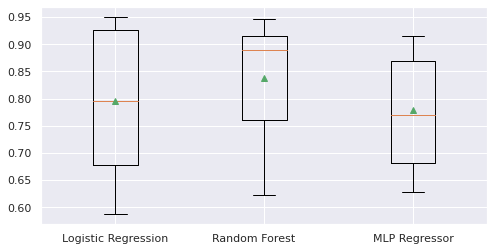

In [302]:
#Se obtienen gráficos de caja para los resultados de validación del métrico MAPE para cada uno de los 3 modelos.
sns.set(rc={'figure.figsize':(8,4)})
bpMAPE = list()
for i in range(len(results)):
  r1 = results[i]["test_MAPE"]
  bpMAPE.append(r1)
plt.boxplot(bpMAPE, labels = names, showmeans = True)
plt.show()

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**